In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [86]:
shampoo = pd.read_csv('shampoo.csv', parse_dates=True).squeeze(1)

In [87]:
shampoo_train = shampoo[0:int(len(shampoo)*0.7)]
shampoo_test = shampoo[int(len(shampoo)*0.7):len(shampoo)]

In [88]:
p = 3
d = 1
q = 2

In [89]:
shampoo_model = ARIMA(shampoo_train['Sales'], order=(p,d,q), trend='t')

In [90]:
shampoo_model_fit = shampoo_model.fit()
print(shampoo_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   25
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -129.179
Date:                Sun, 28 May 2023   AIC                            272.357
Time:                        19:29:55   BIC                            280.603
Sample:                             0   HQIC                           274.545
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.0908      4.721      1.502      0.133      -2.163      16.345
ar.L1         -0.2484      0.245     -1.014      0.311      -0.729       0.232
ar.L2         -0.4998      0.171     -2.927      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
shampoo_forecast = shampoo_model_fit.forecast(steps=len(shampoo_test['Sales']))

In [93]:
print(np.sqrt(mean_squared_error(shampoo_test['Sales'], shampoo_forecast)))

131.43223918045265


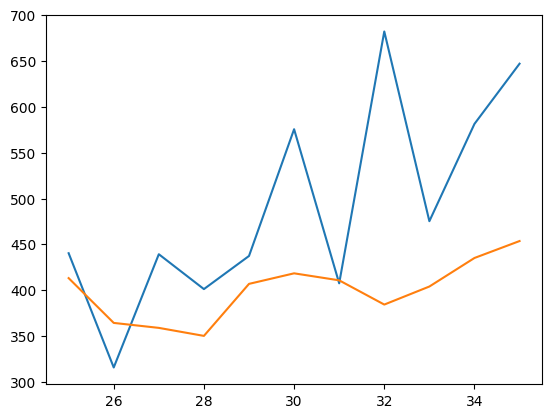

In [94]:
plt.plot(shampoo_test['Sales'])
plt.plot(shampoo_forecast)